# Finding midpoints by intersecting diffusions

In [1]:
import phate
import numpy as np
import graphtools
import scprep

The old wise programmers say to "take the simple things first". Let's follow this adage. 

In [81]:
# the algorithm
def find_diffusion_midpoint(i,j,P,threshold=0.01):
    """
    Diffuses at increasing scales until a point of non-negligible overlap appears between the dirac diffused from i and the dirac diffused from j. Returns this (these) point(s) as the diffusion midpoints.
    """
    assert i != j
    # initialize diracs at i and j
    diffused_i = np.zeros(P.shape[0])
    diffused_i[i] = 1
    diffused_j = np.zeros(P.shape[0])
    diffused_j[j] = 1
    indices_of_intersection = []
    while len(indices_of_intersection) == 0:
        # take one step of diffusion
        diffused_i = diffused_i @ P
        diffused_j = diffused_j @ P
        # find the intersection as the product of the diffusions
        intersection = diffused_i * diffused_j
        print(max(intersection),len(intersection.nonzero()[0]))
        # remove points in the intersection which fall beneath the threshold
        intersection = (intersection >= threshold).astype(int) * intersection
        indices_of_intersection = intersection.nonzero()[0]
    # sort the indices of intersection by the magnitude of intersection
    idxs = np.argsort(intersection[indices_of_intersection])
    return indices_of_intersection[idxs][::-1]

In [62]:
a = np.random.rand(8)
a

array([0.59770302, 0.11415553, 0.99937882, 0.96358742, 0.35056754,
       0.32473415, 0.24905595, 0.77287141])

In [63]:
i = (a > 0.3).nonzero()[0]

In [64]:
idxs = np.argsort(a[i])

In [65]:
i[idxs]

array([5, 4, 0, 7, 3, 2])

In [66]:
a[i[idxs]][::-1]

array([0.99937882, 0.96358742, 0.77287141, 0.59770302, 0.35056754,
       0.32473415])

# Experiments on the Planar graph

In [3]:
grid = np.mgrid[0:4:0.05,0:4:0.05].T.reshape(-1,2)
knn_graph = graphtools.graphs.kNNGraph(grid)

Calculating KNN search...
Calculated KNN search in 0.02 seconds.


Looks pretty good to me. I think PHATE has recovered all of the information in this graph, which bodes well for the diffusion operator PHATE used.

In [4]:
P = knn_graph.P

In [5]:
P.shape

(6400, 6400)

A complication: PHATE has approximated the diffusion operator using "landmarks," resulting in a matrix which is too small to apply 

It's time to test our method for el primero tiempo! 

In [21]:
i = 1400
j = 4691
midpoints = find_diffusion_midpoint(i,j, P, threshold=0)
midpoints

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
2.110869207780276e-27 16


array([2851, 2852, 2928, 2929, 2930, 3006, 3007, 3084, 3085, 3161, 3162,
       3163, 3237, 3238, 3239, 3240])

/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:>

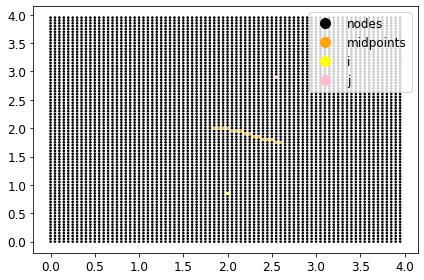

In [25]:
distribution = ['nodes']*P.shape[0]
for m in midpoints:
    distribution[m]='midpoints'
distribution[i] = 'i'
distribution[j] = 'j'
scprep.plot.scatter2d(grid,c=distribution,cmap={'nodes':'black','midpoints':'orange','i':'yellow','j':'pink'})

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
5.472128766105267e-49 7
/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:>

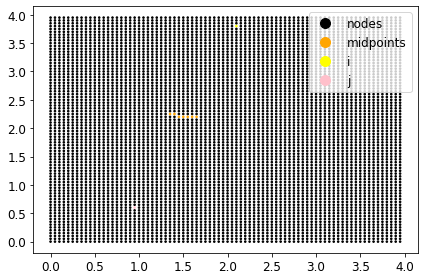

In [29]:
i = np.random.choice(6400)
j = np.random.choice(6400)
midpoints = find_diffusion_midpoint(i,j, P, threshold=0)
distribution = ['nodes']*P.shape[0]
for m in midpoints:
    distribution[m]='midpoints'
distribution[i] = 'i'
distribution[j] = 'j'
scprep.plot.scatter2d(grid,c=distribution,cmap={'nodes':'black','midpoints':'orange','i':'yellow','j':'pink'})

# Testing on the Sphere

In [33]:
# Import dependencies
import plotly
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()
def plot_3d(X,distribution,title="",lim=1):
    d = {'x':X[:,0],'y':X[:,1],'z':X[:,2],'colors':distribution}
    df = pd.DataFrame(data=d)
    fig = px.scatter_3d(df, x='x',y='y',z='z',color='colors', title=title)
    fig.show()

In [30]:
from pecan import data
X = data.sphere(2000)
G = graphtools.graphs.kNNGraph(X)
P = G.P

Calculating KNN search...
Calculated KNN search in 0.02 seconds.


In [58]:
i = np.random.choice(2000)
j = np.random.choice(2000)
midpoints = find_diffusion_midpoint(i,j, P, threshold=0)
distribution = ['nodes']*P.shape[0]
distribution[midpoints[0]] = "largest midpoint"
for m in midpoints[1:]:
    distribution[m]='midpoints'
distribution[i] = 'i'
distribution[j] = 'j'
plot_3d(X,distribution,title="Midpoints by intersection of diffusions")

0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
5.207344293551821e-22 1


# Next steps: combining several of these operations to create a diffusion ray
It's hard to tell exactly how well this if it is working. That shall become more apparent if we iterate the midpoint operation on the midpoints themselves. This will lead to the construction is what it is, hopefully a geodesic ray on the manifold.

In [72]:
i = np.random.choice(6400)
j = np.random.choice(6400)

In [84]:
def insert_midpoints(sorted_list, P, threshold=0):
    """
    Given a list of sorted indices, inserts the index of the midpoint between each consecutive pair of points, and returns a new list.
    """
    new_list = []
    for idx1,idx2 in zip(sorted_list[:-1],sorted_list[1:]):
        midpoints = find_diffusion_midpoint(idx1, idx2, P, threshold=threshold)
        m = midpoints[0]
        new_list.extend([idx1, m])
    new_list.append(idx2)
    return new_list
def iterative_midpoints(sorted_list,P,num_iterations = 4, threshold=0):
    for i in range(num_iterations):
        sorted_list = insert_midpoints(sorted_list,P,threshold=threshold)
    return sorted_list

In [79]:
grid = np.mgrid[0:4:0.05,0:4:0.05].T.reshape(-1,2)
knn_graph = graphtools.graphs.kNNGraph(grid)
P = knn_graph.P

Calculating KNN search...
Calculated KNN search in 0.03 seconds.


0.0 0
0.0 0
0.0 0
0.0 0
0.0 0
2.6811214043332956e-09 4
0.0 0
0.0 0
2.6920878796276133e-05 2
0.0 0
0.0 0
3.0115887403797494e-05 3
0.0 0
0.001992889265616538 5
0.0 0
0.0029645568107106567 6
0.0 0
0.00183571135695934 4
0.0 0
0.0032519927624822726 5
0.030303030303030304 1
0.024242424242424242 4
0.020512820512820513 1
0.02366863905325444 6
0.02366863905325444 1
0.027972027972027975 3
0.030303030303030304 2
0.027777777777777776 4
/Users/adjourner/Library/Caches/pypoetry/virtualenvs/pecan-CtxN46k2-py3.7/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



<AxesSubplot:>

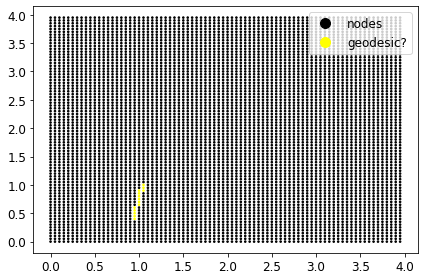

In [89]:
i = np.random.choice(6400)
j = np.random.choice(6400)
geodesic = iterative_midpoints([i,j],P,num_iterations=4)
distribution = ['nodes']*P.shape[0]
for m in geodesic:
    distribution[m]='geodesic?'
scprep.plot.scatter2d(grid,c=distribution,cmap={'nodes':'black','geodesic?':'yellow'})